# Práctica 5. Wordlet - cadenas de caracteres (Tema 5)
## Solución de la práctica

### Objetivos
- Profundizar en el manejo de las cadenas de caracteres mediante índices.
- Adquirir gran manejo y experiencia trabajando con bucles.
- Implementar una solución compleja a partir de unos requisitos dados.
- Aplicar la algorítmica necesaria para alcanzar un producto de software completo.

### Restricciones
- Se escribirá todo el programa en una celda.
- Solo se podrán utilizar las librerías, funciones y estructuras vistas en clase.
- Solo se podrán utilizar bucles **while**.
- No se podrá utilizar el **operador in**.

### Funcionalidad del programa

Se implementará el juego del Wordlet.

Existirá una palabra clave de 5 letras a acertar, la cual se guardará en una variable. El juego proporcionará 5 opciones al usuario para acertar la palabra introducida indicando las pistas siguientes:
- Letra GRIS: no existe la letra en la palabra a acertar
- Letra AMARILLO: existe pero no en la posición correcta
- Letra VERDE: existe esa letra y está en la posición correcta.

Se asume que todas las palabras que introduzca el usuario serán de 5 letras. 

El programa gestionará las palabras en mayúsculas, se escriban como se escriban.


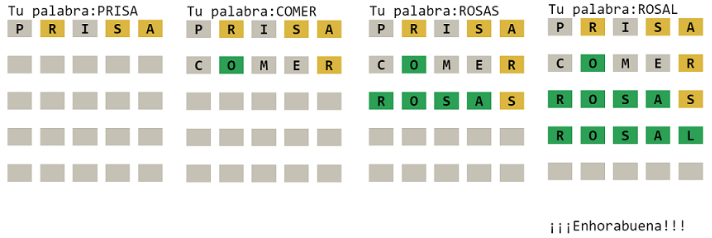

### Implementación del programa

Se desarrollará de forma incremental, llegando a soluciones parciales plenamente funcionales. No se pasará a la siguiente fase hasta no tener un producto funcional.

#### Incremento I

Mostrar el tablero vacío del juego y comprobar que se puede mostrar celdas de colores. Se proporciona un código de ejemplo. Vease cómo los códigos de colores proporcionados permiten aplicar un color de fondo o el de por defecto. 
- Probar a crear un tablero sin letras (vacío).
- Crear un tablero con el fondo verde o amarillo. 

A continuación se muestra una ayuda sobre el funcionamiento de coloreado del fondo de caracteres. Existen unos códigos de consola que permiten **modicar la apariencia del texto que se escribe posteriormente**. Por ejemplo, si deseo que aparezca "Hola" en verde, "Adiós" en amarillo y "Me voy" en el color por defecto (negro), deberá poner: 

In [36]:
GRIS = "\033[1;47m"
VERDE = "\033[1;42m"
AMARILLO = "\033[1;43m"
DEFECTO = "\033[0m"

print(VERDE,"Hola",AMARILLO, "Adiós", GRIS, " Bye", DEFECTO, "Me voy")

 Hola  Adiós   Bye  Me voy


Intercalamos los colores mostrando solo espacios...

In [38]:
print(VERDE," ", DEFECTO, AMARILLO, " ", DEFECTO, VERDE," ",DEFECTO, AMARILLO, "  ")

Con f-strings...

In [39]:
print(f"{VERDE}   {DEFECTO} {AMARILLO}   {DEFECTO} {VERDE}   {DEFECTO} {AMARILLO}   ")

In [37]:
GRIS = "\033[1;47m"
VERDE = "\033[1;42m"
AMARILLO = "\033[1;43m"
DEFECTO = "\033[0m"

palabra_objetivo = "abcde"
letra_vacia = "   "
filas = 0
while filas < 5:
    columnas = 0
    while columnas < len(palabra_vacia):
        print(f"{GRIS}{letra_vacia}{DEFECTO} ", end = "")  # Ojo con los escpacios, son los que permiten establecer la separación entre celdas
        columnas += 1
    print("\n")  # Los dos retornos de carro permiten establecer el espacio vertical
    filas += 1

#### Incremento II

Pedir palabras por teclado e insertarlas en cada una de las filas.

#### Incremento III

Como se sabe que todas las palabras tendrán una longitudd de 5 caracteres, las palabras que vaya introduciendo por teclado el usuario serán guardadas en una única variable, quedando almacenado así después de introducir las 5 palabras: CISNE, ARBOL, CARPA, COMER y RISAS.
```
"CISNEARBOLCARPACOMERRISAS"  --> string de palabras introducidas
 0123456789012345678901234   --> índice
   1    2     3    4   5     --> # palabra

```

#### Incremento IV

Crear el tablero real del juego mezclando las filas de las palabras escritas y con las filas vacías, para que formen un total de 5 filas.

## Solución

In [35]:
FILAS_MAX = 5
INTENTOS_MAX = FILAS_MAX
LETRAS_POR_PALABRA = 5
CARACTERES_MAXIMOS = FILAS_MAX * LETRAS_POR_PALABRA
CELDA_VACIA = " "

GRIS = "\033[1;47m"
VERDE = "\033[1;42m"
AMARILLO = "\033[1;43m"
DEFECTO = "\033[0m"

palabra_objetivo = "ROSAL"
palabra_agrupada = ""
intentos = 0 


while intentos < INTENTOS_MAX:
    """
    Pide la palabra
    """    
    palabra = input("Tu palabra:")
    palabra = palabra.upper()
    palabra_agrupada += palabra

    indice = 0
    while indice < CARACTERES_MAXIMOS:
        """
        Si hay alguna letra introducida, determino el color. 
        Si no, muestro la casilla vacía.
        """
        if indice < len(palabra_agrupada):
            letra = palabra_agrupada[indice]
            # indice hasta 25, indice_adaptado hasta 5 (palabra_objetivo)
            indice_adaptado = indice - (indice//LETRAS_POR_PALABRA) * LETRAS_POR_PALABRA  
            if letra == palabra_objetivo[indice_adaptado]:
                """
                Laletra coincide con la misma posición de la palabra objetivo
                """
                print(f"{VERDE} {letra} {DEFECTO} ", end = "")
            else:
                """
                ¿La letra está en alguna posición de la palabra objetivo?
                """                  
                indice_letra_amarilla = 0
                is_letra_amarilla = False  # Nos ayuda a saber si habrá alguna letra dentro de la palabra en otra posición
                while indice_letra_amarilla < len(palabra_objetivo):
                    if letra == palabra_objetivo[indice_letra_amarilla]:
                        is_letra_amarilla = True
                    indice_letra_amarilla += 1
                
                if is_letra_amarilla == True:
                    print(f"{AMARILLO} {letra} {DEFECTO} ", end = "")
                else:
                    print(f"{GRIS} {letra} {DEFECTO} ", end = "")
        else:
            print(f"{GRIS} {CELDA_VACIA} {DEFECTO} ", end = "") 

        indice += 1  
        
        if indice % LETRAS_POR_PALABRA == 0:
            print("\n")
            
    intentos += 1
    
    if palabra == palabra_objetivo:
        intentos = INTENTOS_MAX
        
if palabra == palabra_objetivo:
    print("\n¡¡¡Enhorabuena!!!\n")

Tu palabra:PRISA
 P   R   I   S   A  

                    

                    

                    

                    

Tu palabra:COMER
 P   R   I   S   A  

 C   O   M   E   R  

                    

                    

                    

Tu palabra:ROSAS
 P   R   I   S   A  

 C   O   M   E   R  

 R   O   S   A   S  

                    

                    

Tu palabra:ROSAL
 P   R   I   S   A  

 C   O   M   E   R  

 R   O   S   A   S  

 R   O   S   A   L  

                    


¡¡¡Enhorabuena!!!

